In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "../data"
file_paths = {
    "benin": os.path.join(data_dir, "benin-malanville.csv"),
    "sierra_leone": os.path.join(data_dir, "sierraleone-bumbuna.csv"),
    "togo": os.path.join(data_dir, "togo-dapaong_qc.csv"),
}

In [3]:
dataframes = {}
for name, path in file_paths.items():
    dataframes[name] = pd.read_csv(path)

for name, df in dataframes.items():
    print(f"Dataframe {name.upper()}:")
    print(df.head())
    print()

Dataframe BENIN:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Da

In [4]:
# task 1 Summary Statistics 

In [5]:
for dataset_name, dataset_frame in dataframes.items():
    print("\nStatistics of the data: {}".format(dataset_name.upper()))
    statistics_summary = dataset_frame.describe(include='all')
    print(statistics_summary)


Statistics of the data: BENIN
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-08-08 23:44            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000 

In [6]:
# task 2 data quality check

In [7]:
# task 2.1 checking for missing values

In [8]:
for name, df in dataframes.items():
    print(f"{name.upper()}")
    print(df.isnull().sum())

BENIN
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
SIERRA_LEONE
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
TOGO
Timestamp             0
GHI           

In [9]:
# task 2.2 checking for outliners using(z-score)

In [10]:
print("\nOutlier Detection (Z-score):")

for name, df in dataframes.items():
    print(f"\nOutliers in {name.upper()}:")
    for col in df.select_dtypes(include=[np.number]):
        mean = df[col].mean()
        std = df[col].std()
        z_scores = (df[col] - mean) / std
        outliers = df.loc[abs(z_scores) > 3]
        print(f"- Column: {col}")
        if outliers.empty:
            print("  No outliers detected.")
        else:
            print(f"  Number of outliers: {outliers.shape[0]}")


Outlier Detection (Z-score):

Outliers in BENIN:
- Column: GHI
  Number of outliers: 89
- Column: DNI
  No outliers detected.
- Column: DHI
  Number of outliers: 3738
- Column: ModA
  Number of outliers: 27
- Column: ModB
  Number of outliers: 63
- Column: Tamb
  No outliers detected.
- Column: RH
  No outliers detected.
- Column: WS
  Number of outliers: 3109
- Column: WSgust
  Number of outliers: 3500
- Column: WSstdev
  Number of outliers: 5653
- Column: WD
  No outliers detected.
- Column: WDstdev
  Number of outliers: 4765
- Column: BP
  Number of outliers: 865
- Column: Cleaning
  Number of outliers: 485
- Column: Precipitation
  Number of outliers: 1402
- Column: TModA
  Number of outliers: 10
- Column: TModB
  Number of outliers: 98
- Column: Comments
  No outliers detected.

Outliers in SIERRA_LEONE:
- Column: GHI
  Number of outliers: 2477
- Column: DNI
  Number of outliers: 7586
- Column: DHI
  Number of outliers: 2986
- Column: ModA
  Number of outliers: 1604
- Column: Mod

In [11]:
# task 2.3 looking for nrgative values

In [12]:
for name, df in dataframes.items():
    print(f"\nNegative values in {name.upper()}:")
    for col in df.select_dtypes(include=[np.number]):
        if col in ["GHI", "DNI", "DHI", "WS", "Tamb", "TModA", "TModB"]:
            negatives = df[df[col] < 0]
            if negatives.empty:
                print(f"  Column: {col} - No negative values.")
            else:
                print(f"  Column: {col} - {negatives.shape[0]} negative values.")


Negative values in BENIN:
  Column: GHI - 258847 negative values.
  Column: DNI - 275987 negative values.
  Column: DHI - 259182 negative values.
  Column: Tamb - No negative values.
  Column: WS - No negative values.
  Column: TModA - No negative values.
  Column: TModB - No negative values.

Negative values in SIERRA_LEONE:
  Column: GHI - 261135 negative values.
  Column: DNI - 266352 negative values.
  Column: DHI - 263128 negative values.
  Column: Tamb - No negative values.
  Column: WS - No negative values.
  Column: TModA - No negative values.
  Column: TModB - No negative values.

Negative values in TOGO:
  Column: GHI - 257385 negative values.
  Column: DNI - No negative values.
  Column: DHI - No negative values.
  Column: Tamb - No negative values.
  Column: WS - No negative values.
  Column: TModA - No negative values.
  Column: TModB - No negative values.


In [13]:
# task3 Correlation Analysis

In [14]:
for name, df in dataframes.items():
    print(f"\nCorrelation Matrix: {name.upper()}")
    corr = df.select_dtypes(include=[np.number]).corr()
    print(corr)


Correlation Matrix: BENIN
                    GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.882376  0.849989  0.994443  0.994869  0.547513   
DNI            0.882376  1.000000  0.546602  0.892023  0.892012  0.467584   
DHI            0.849989  0.546602  1.000000  0.829923  0.827886  0.503925   
ModA           0.994443  0.892023  0.829923  1.000000  0.998745  0.526868   
ModB           0.994869  0.892012  0.827886  0.998745  1.000000  0.525370   
Tamb           0.547513  0.467584  0.503925  0.526868  0.525370  1.000000   
RH            -0.360029 -0.373475 -0.285018 -0.383205 -0.365718 -0.414842   
WS             0.457349  0.397099  0.426959  0.458483  0.450123  0.347188   
WSgust         0.484144  0.419469  0.450904  0.484429  0.476380  0.362403   
WSstdev        0.446526  0.383303  0.414711  0.443467  0.438523  0.342418   
WD             0.079664  0.018839  0.102752  0.050262  0.061473  0.188081   
WDstdev        0.547242  0.471152  0.505968  0.53

In [15]:
# task 4 wind analysis


BENIN


<Figure size 1000x800 with 0 Axes>

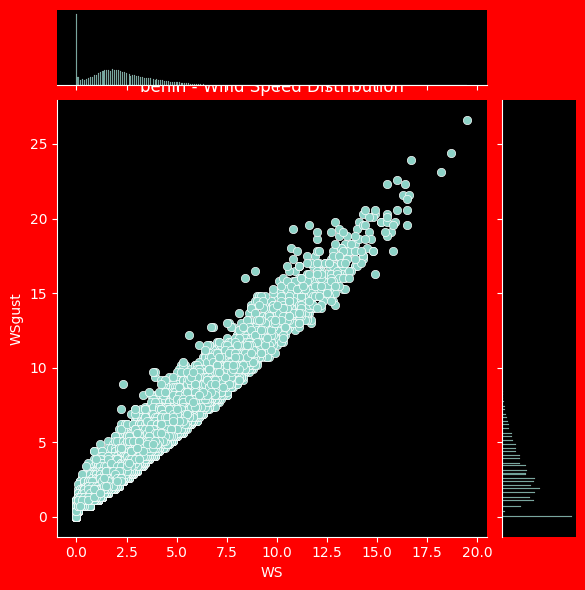


SIERRA_LEONE


<Figure size 1000x800 with 0 Axes>

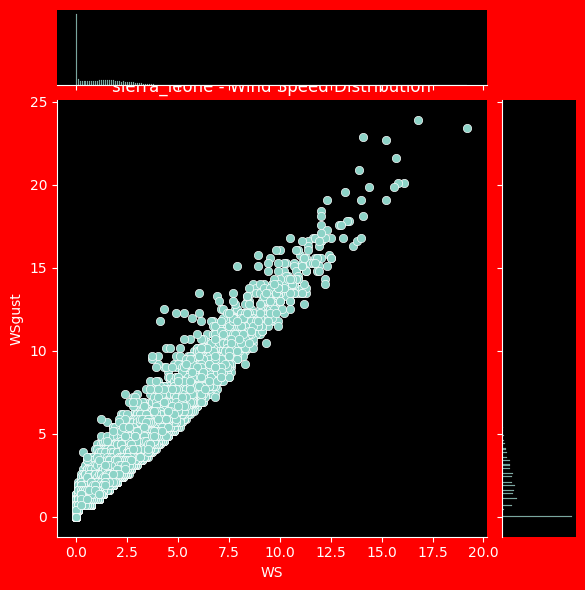


TOGO


<Figure size 1000x800 with 0 Axes>

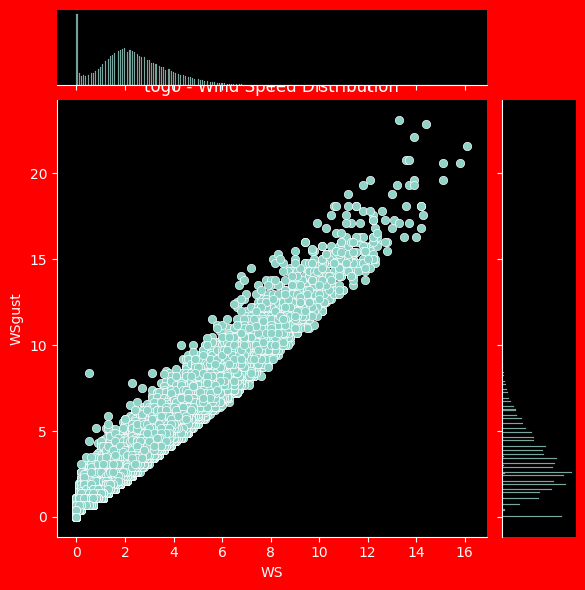

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to red
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'red'

for name, df in dataframes.items():
    print("\n{}".format(name.upper()))
    
    # Create the joint plot with a red background
    fig = plt.figure(figsize=(10, 8))
    sns.jointplot(x="WS", y="WSgust", data=df)
    
    # Set the title and show the plot
    plt.title(f"{name} - Wind Speed Distribution", color='white')
    plt.show()

In [17]:
#task 5 temprature analysis


BENIN


<Figure size 1000x800 with 0 Axes>

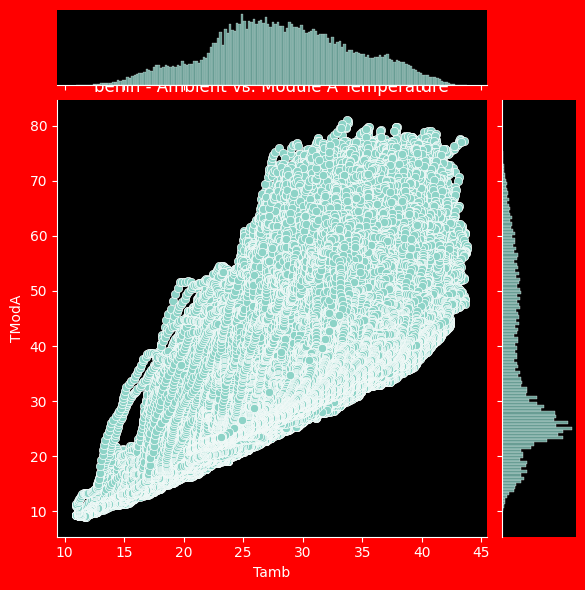


SIERRA_LEONE


<Figure size 1000x800 with 0 Axes>

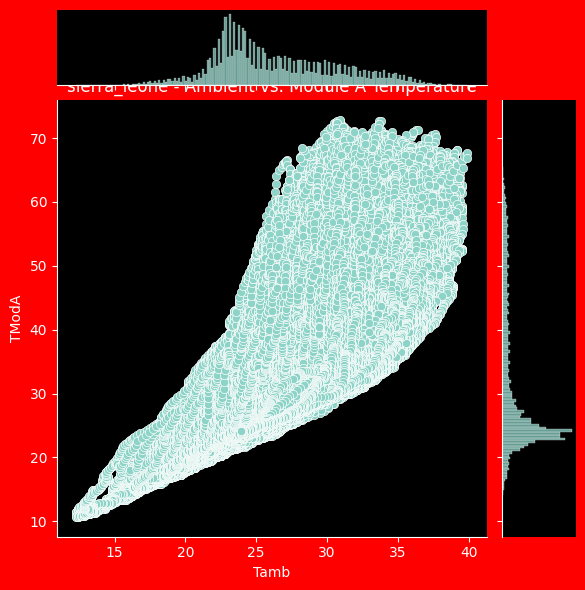


TOGO


<Figure size 1000x800 with 0 Axes>

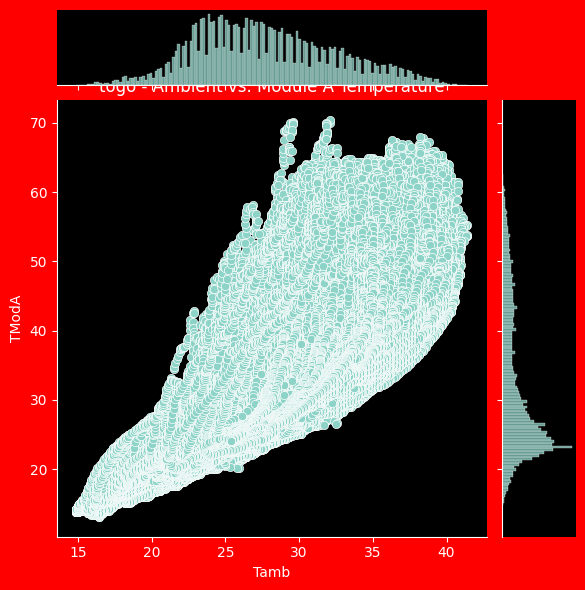

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the background color to red
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'red'

for name, df in dataframes.items():
    print("\n{}".format(name.upper()))
    
    # Create the joint plot with a red background
    fig = plt.figure(figsize=(10, 8))
    sns.jointplot(x="Tamb", y="TModA", data=df)
    
    # Set the title and show the plot
    plt.title(f"{name} - Ambient vs. Module A Temperature", color='white')
    plt.show()